In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime 

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
pip install keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/fe/58/34d4d8f1aa11120c2d36d7ad27d0526164b1a8ae45990a2fede31d0e59bf/keras-2.14.0-py3-none-any.whl.metadata
  Using cached keras-2.14.0-py3-none-any.whl.metadata (2.4 kB)
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 87.1 kB/s eta 0:00:20
    --------------------------------------- 0.0/1.7 MB 87.1 kB/s eta 0:00:20
    -------------------------------

In [5]:
from keras.models import Sequential 
from keras.utils import to_categorical 
from keras.optimizers import Adam 

from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

np.random.seed(0)


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
#load dataset 


data = pd.read_csv('weatherAUS.csv')
data.head()

In [ ]:
data.info()

In [ ]:
1. There is missing values 
2. we have categorical data / numerical data 

<Axes: xlabel='RainTomorrow', ylabel='count'>

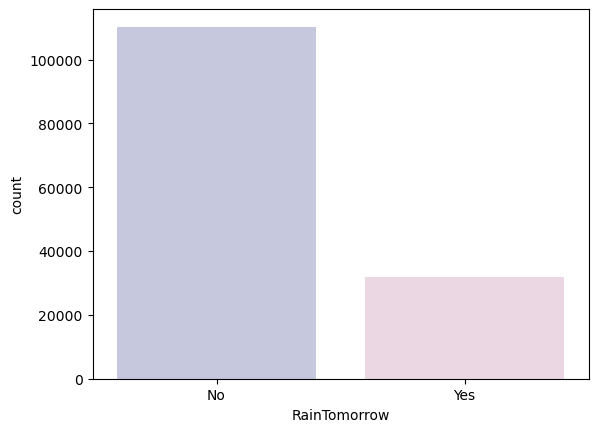

In [7]:
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= data["RainTomorrow"], palette= cols)

C:\Users\rampa\AppData\Local\Temp\ipykernel_6756\392230338.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


<Axes: >

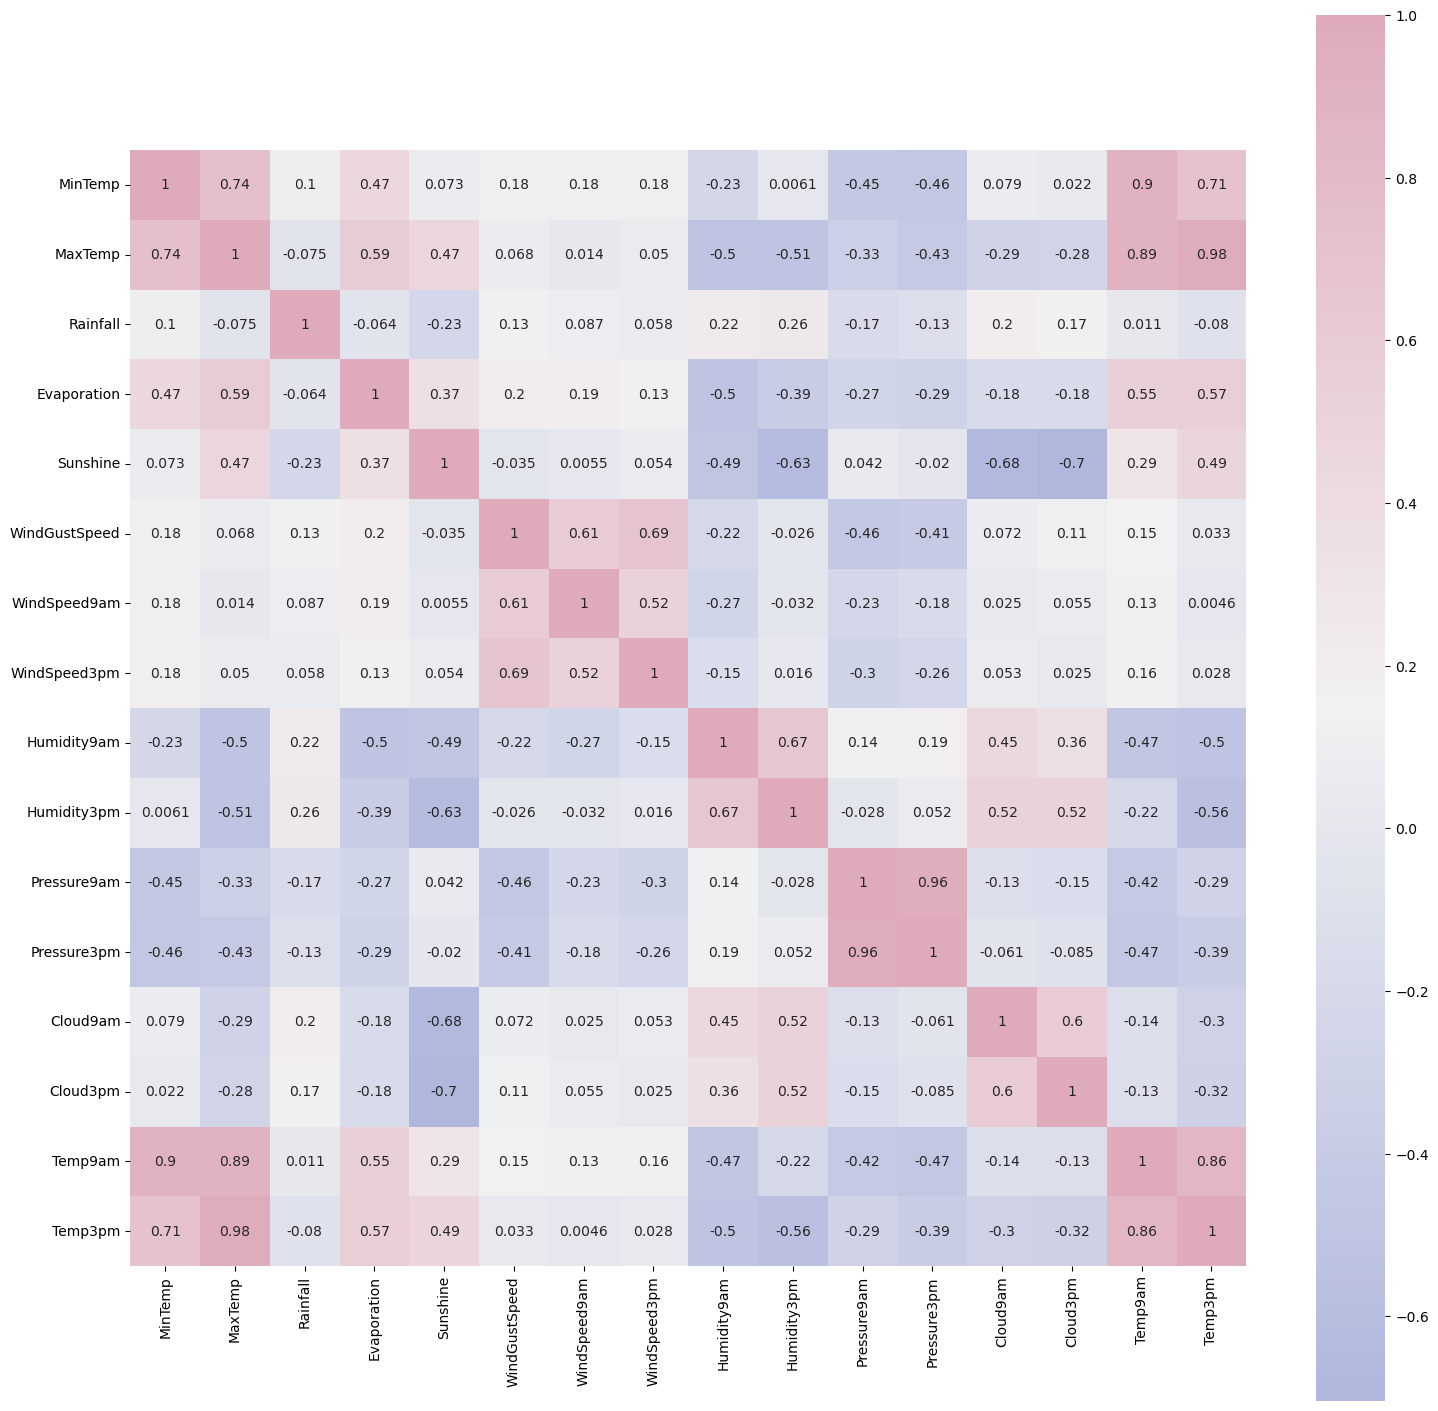

In [10]:
corrmat = data.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True) 
plt.subplots(figsize=(18,18)) 

sns.heatmap(corrmat, cmap= cmap, annot=True, square=True)

In [11]:
lengths = data["Date"].str.len()
lengths.value_counts()

10    145460
Name: Date, dtype: int64

In [12]:
data['Date']= pd.to_datetime(data["Date"]) 

data['year'] = data.Date.dt.year 



def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

data['month'] = data.Date.dt.month
data = encode(data, 'month', 12) 

data['day'] = data.Date.dt.day
data = encode(data, 'day', 31) 

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,year,month,month_sin,month_cos,day,day_sin,day_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,21.8,No,No,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,24.3,No,No,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,23.2,No,No,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,26.5,No,No,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,29.7,No,No,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


Text(0.5, 0, 'Days In Year')

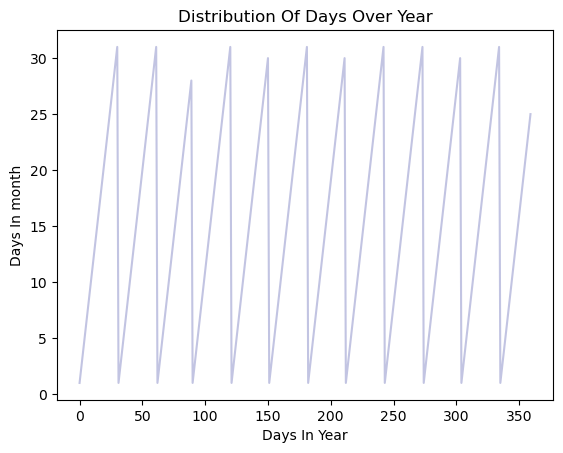

In [13]:
section = data[:360] 
tm = section["day"].plot(color="#C2C4E2")
tm.set_title("Distribution Of Days Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

Text(0.5, 0, 'Sine Encoded Months')

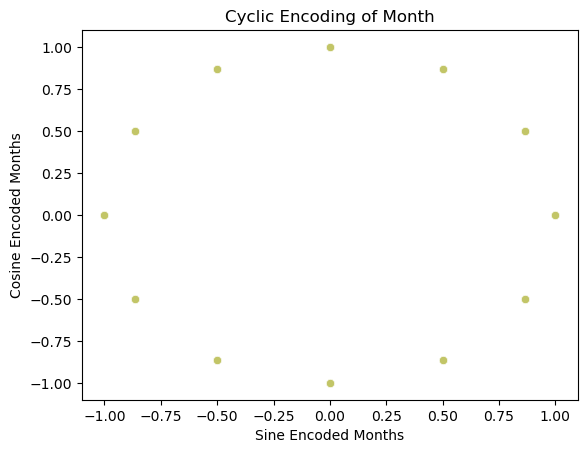

In [15]:
cyclic_month = sns.scatterplot(x="month_sin",y="month_cos",data=data, color="#C2C567")
cyclic_month.set_title("Cyclic Encoding of Month")
cyclic_month.set_ylabel("Cosine Encoded Months")
cyclic_month.set_xlabel("Sine Encoded Months")

Text(0.5, 0, 'Sine Encoded Day')

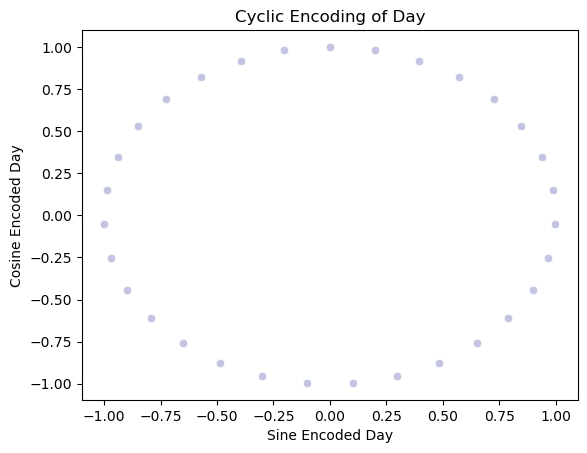

In [16]:
cyclic_day = sns.scatterplot(x='day_sin',y='day_cos',data=data, color="#C2C4E2")
cyclic_day.set_title("Cyclic Encoding of Day")
cyclic_day.set_ylabel("Cosine Encoded Day")
cyclic_day.set_xlabel("Sine Encoded Day")

In [18]:
# Categorical variables - mode 

# Numerical data - mean, median 


In [19]:
s = (data.dtypes== 'object') 
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [20]:
for i in object_cols:
    print(i, data[i].isnull().sum())

Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [21]:
for i in object_cols:
    data[i].fillna(data[i].mode()[0], inplace=True)

In [22]:
# Numerical variables 
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


In [23]:
for i in num_cols:
    print(i, data[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
month_sin 0
month_cos 0
day_sin 0
day_cos 0


In [24]:
for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [25]:
label_encoder = LabelEncoder() 

for i in object_cols:
    data[i] = label_encoder.fit_transform(data[i]) 
    
    

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int32         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  int32         
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  int32         
 10  WindDir3pm     145460 non-null  int32         
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [26]:
features = data.drop(['RainTomorrow', 'Date','day', 'month'], axis=1) # dropping target  

In [27]:
target = data['RainTomorrow']

In [28]:
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,145460.0,7.815677e-18,1.000003,-1.672228,-0.899139,0.014511,0.857881,1.701250
MinTemp,145460.0,-4.501830e-16,1.000003,-3.250525,-0.705659,-0.030170,0.723865,3.410112
MaxTemp,145460.0,3.001220e-16,1.000003,-3.952405,-0.735852,-0.086898,0.703133,3.510563
Rainfall,145460.0,7.815677e-18,1.000003,-0.275097,-0.275097,-0.275097,-0.203581,43.945571
Evaporation,145460.0,-3.282584e-17,1.000003,-1.629472,-0.371139,-0.119472,0.006361,43.985108
Sunshine,145460.0,-5.424080e-16,1.000003,-2.897217,0.076188,0.148710,0.257494,2.360634
WindGustDir,145460.0,6.252542e-18,1.000003,-1.724209,-0.872075,0.193094,1.045228,1.471296
WindGustSpeed,145460.0,1.824961e-16,1.000003,-2.588407,-0.683048,-0.073333,0.460168,7.243246
WindDir9am,145460.0,7.190423e-17,1.000003,-1.550000,-0.885669,0.000105,0.885879,1.771653
WindDir3pm,145460.0,8.284618e-17,1.000003,-1.718521,-0.837098,0.044324,0.925747,1.586813


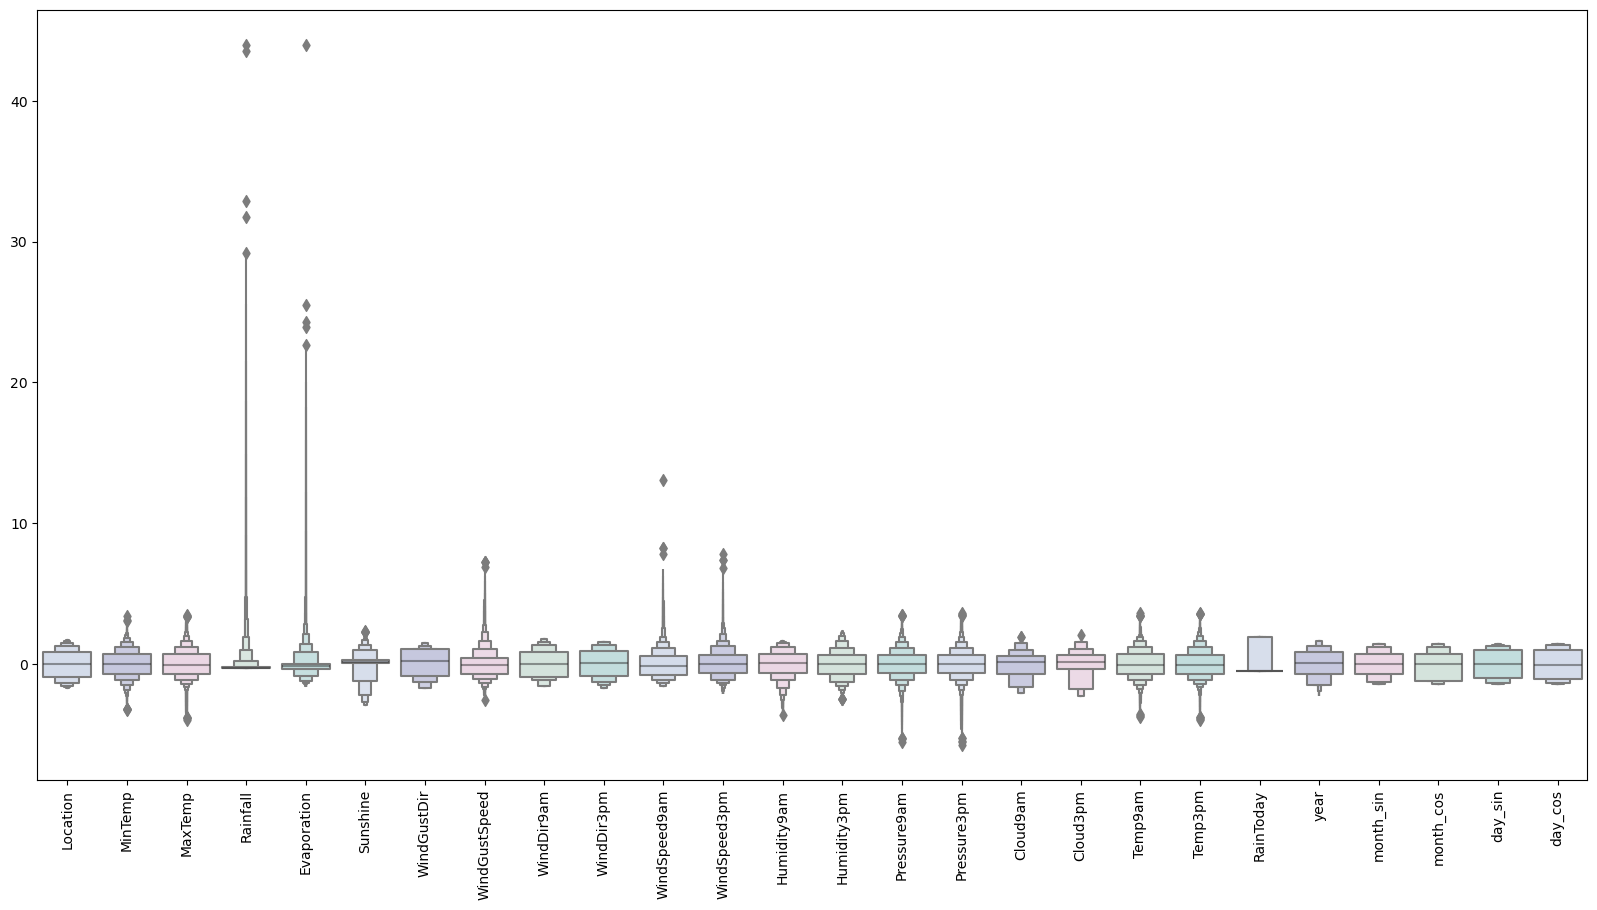

In [29]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [30]:
features["RainTomorrow"] = target

In [31]:

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]

In [32]:
features.shape

(127536, 27)

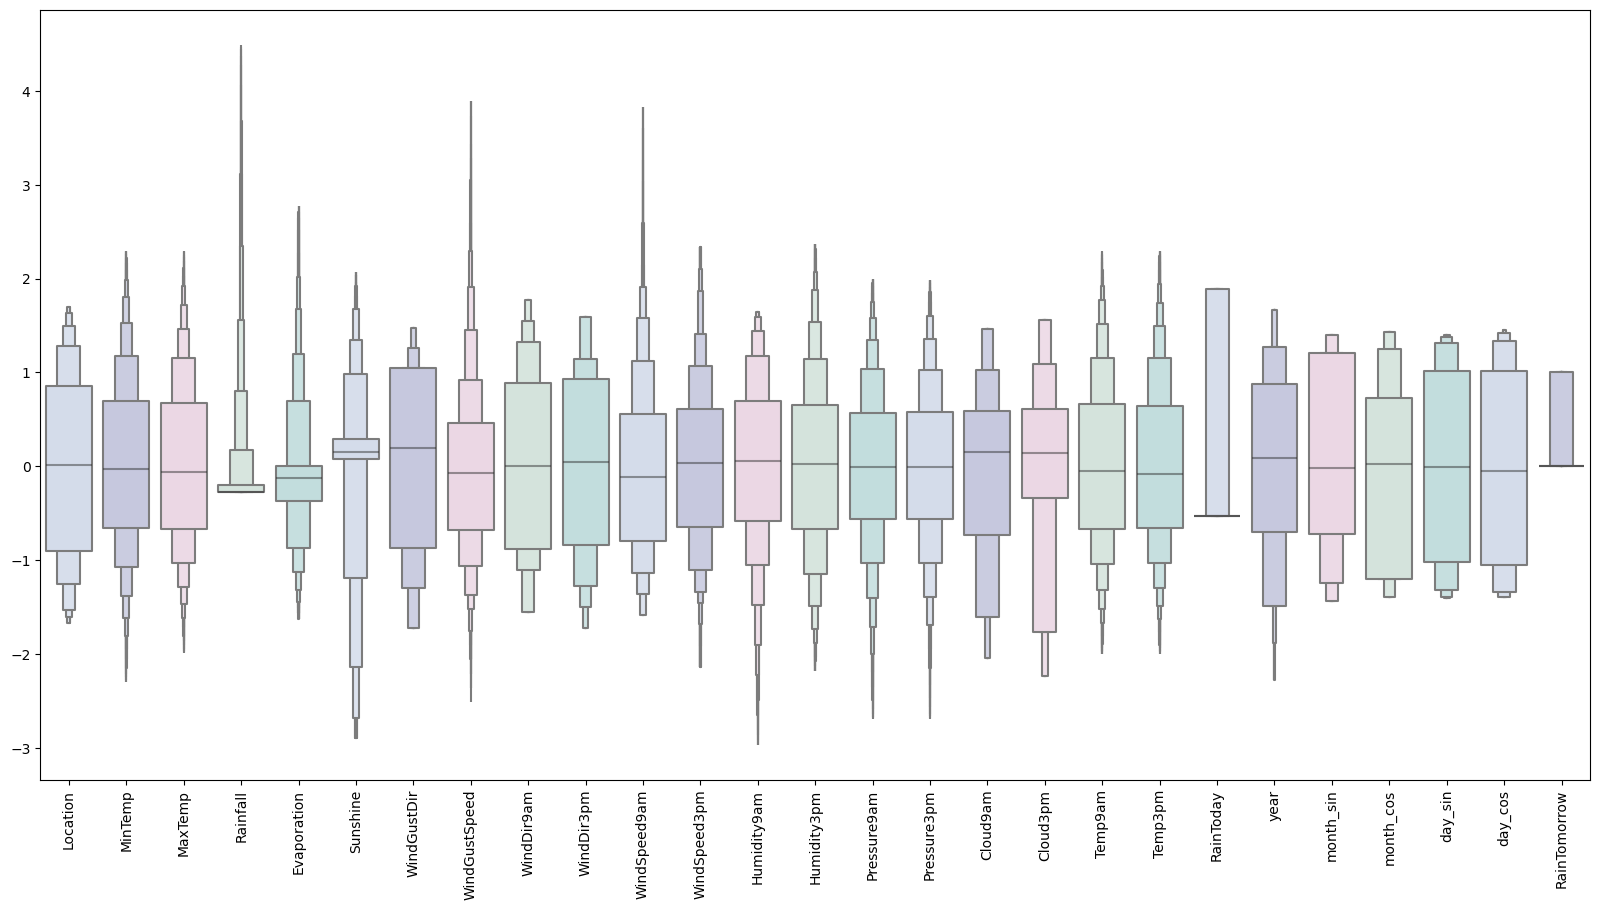

In [33]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

## artificial neural network 

1. Assining X and y the status of attributes and tags
2. Splitting test and training sets
3. Initialising the neural network
4. Defining by adding layers
5. Compiling the neural network
6. Train the neural network

In [34]:
X = features.drop(['RainTomorrow'], axis = 1) 
y = features['RainTomorrow']

In [35]:
# split train - test 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [36]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [37]:
#model
model = Sequential()


In [38]:
#input layer 
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))

In [39]:
# ann hidden layer 
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))

In [40]:
#output layer 

model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [41]:
opt = Adam(learning_rate=0.00009)

In [42]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
# asking learn the data 

history  = model.fit(X_train,y_train, batch_size=32,epochs=150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
2551/2551 [==============================] - 12s 4ms/step - loss: 0.4861 - accuracy: 0.7841 - val_loss: 0.3961 - val_accuracy: 0.7860
Epoch 2/150
2551/2551 [==============================] - 13s 5ms/step - loss: 0.4297 - accuracy: 0.7842 - val_loss: 0.3896 - val_accuracy: 0.7860
Epoch 3/150
2551/2551 [==============================] - 12s 5ms/step - loss: 0.4256 - accuracy: 0.7842 - val_loss: 0.3887 - val_accuracy: 0.7860
Epoch 4/150
2551/2551 [==============================] - 13s 5ms/step - loss: 0.4216 - accuracy: 0.7842 - val_loss: 0.3869 - val_accuracy: 0.7860
Epoch 5/150
2551/2551 [==============================] - 12s 5ms/step - loss: 0.4231 - accuracy: 0.7842 - val_loss: 0.3869 - val_accuracy: 0.7860
Epoch 6/150
2551/2551 [==============================] - 13s 5ms/step - loss: 0.4220 - accuracy: 0.7842 - val_loss: 0.3864 - val_accuracy: 0.7860
Epoch 7/150
2551/2551 [==============================] - 12s 5ms/step - loss: 0.4218 - accuracy: 0.7842 - val_loss: 0.3872 -

Epoch 57/150
2551/2551 [==============================] - 11s 4ms/step - loss: 0.4104 - accuracy: 0.7842 - val_loss: 0.3789 - val_accuracy: 0.7860
Epoch 58/150
2551/2551 [==============================] - 11s 4ms/step - loss: 0.4115 - accuracy: 0.7842 - val_loss: 0.3776 - val_accuracy: 0.7860
Epoch 59/150
2551/2551 [==============================] - 12s 5ms/step - loss: 0.4113 - accuracy: 0.7842 - val_loss: 0.3780 - val_accuracy: 0.7860
Epoch 60/150
2551/2551 [==============================] - 12s 5ms/step - loss: 0.4094 - accuracy: 0.7842 - val_loss: 0.3779 - val_accuracy: 0.7860
Epoch 61/150
2551/2551 [==============================] - 16s 6ms/step - loss: 0.4116 - accuracy: 0.7842 - val_loss: 0.3775 - val_accuracy: 0.7860
Epoch 62/150
2551/2551 [==============================] - 13s 5ms/step - loss: 0.4099 - accuracy: 0.7842 - val_loss: 0.3780 - val_accuracy: 0.7860
Epoch 63/150
2551/2551 [==============================] - 11s 4ms/step - loss: 0.4103 - accuracy: 0.7842 - val_loss: 0

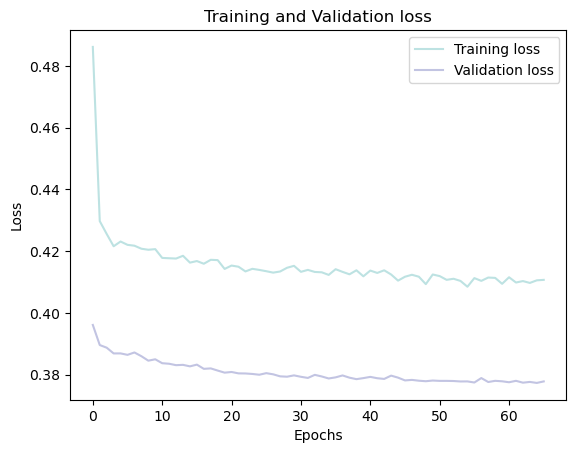

In [44]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

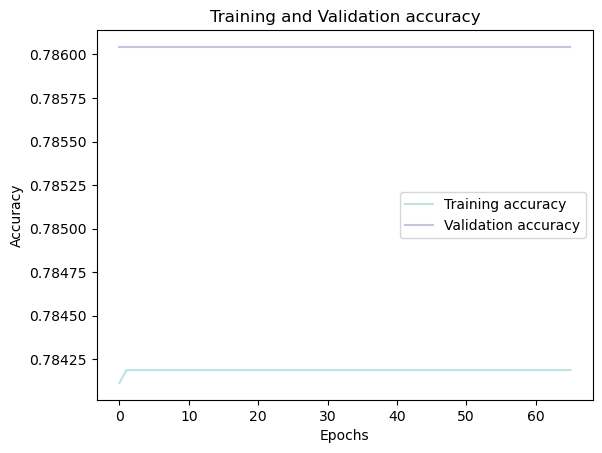

In [45]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
y_pred= model.predict(X_test)

798/798 [==============================] - 1s 1ms/step


In [47]:
X_test

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,month_sin,month_cos,day_sin,day_cos
29216,0.717319,-0.093006,0.900640,-0.275097,-0.119472,0.148710,-1.298142,-0.073333,0.221549,-1.277810,...,0.149133,0.137693,0.560202,0.909563,-0.529795,0.484794,-0.725379,1.245139,1.353796,-0.330159
3161,-1.391105,-1.161221,-0.157436,-0.275097,-0.119472,0.148710,-1.298142,-1.216548,1.107323,-1.718521,...,0.149133,0.137693,-0.447663,-0.418781,-0.529795,-1.485514,0.692529,-1.198979,0.549587,1.339551
91941,-0.688297,0.723865,0.420979,-0.275097,-0.119472,0.148710,-0.872075,-0.225761,-1.328556,-0.616743,...,0.149133,0.137693,1.025371,0.471647,-0.529795,0.090732,-1.244369,0.728636,-1.192778,0.782805
105297,0.295634,-0.721368,-1.300159,0.201676,-0.088014,-1.736864,1.258262,2.441741,0.000105,1.146102,...,1.464068,0.137693,-1.021370,-1.265418,1.887521,1.272917,-1.244369,0.728636,1.012774,1.011221
12787,-0.196331,0.079794,1.055825,-0.275097,1.296153,0.438799,-0.872075,-0.378190,-1.328556,-0.837098,...,0.587445,1.087018,0.885820,1.143118,-0.529795,-1.091452,-0.016425,1.434192,-1.360192,-0.330159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21971,0.225354,0.865246,-0.101006,2.442508,-0.434056,0.511321,-0.872075,1.755812,-0.442782,-0.396387,...,-1.604113,-1.760956,0.637730,0.019135,1.887521,-0.697391,-0.016425,-1.388032,0.549587,1.339551
24442,0.436196,-0.265806,-0.580667,-0.132065,-0.119472,0.148710,-1.085108,-0.530619,1.550210,-0.616743,...,0.149133,0.137693,-0.633730,-0.564753,1.887521,-1.485514,-1.244369,0.728636,1.105265,-0.846162
91504,-0.688297,0.299720,0.068287,-0.275097,-0.119472,0.148710,1.471296,-0.683048,-0.221338,-1.718521,...,0.149133,0.137693,0.281101,0.062926,-0.529795,-0.303329,-0.016425,-1.388032,-0.422828,-1.334442
142002,-0.758577,1.210845,1.323871,-0.275097,0.761361,1.127759,-1.085108,-0.073333,-0.664226,-1.057454,...,-1.604113,-1.760956,1.506045,1.259896,-0.529795,1.272917,-1.244369,-0.682476,-0.803968,1.199371


In [53]:
y_pred =(y_pred>0.5)

<Axes: >

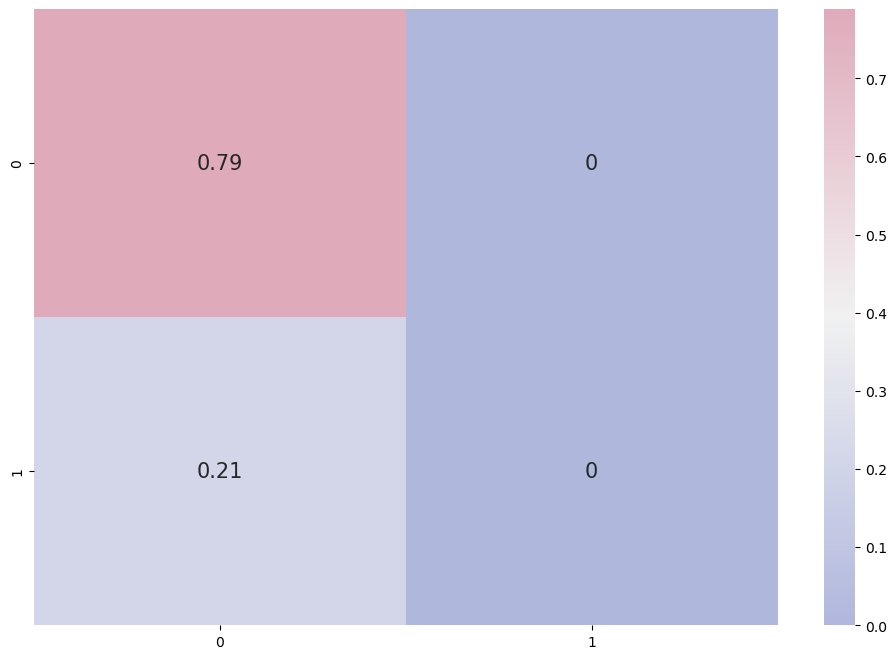

In [54]:
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     20110
           1       0.00      0.00      0.00      5398

    accuracy                           0.79     25508
   macro avg       0.39      0.50      0.44     25508
weighted avg       0.62      0.79      0.70     25508



C:\Users\rampa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rampa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rampa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
